<a href="https://colab.research.google.com/github/cdsrijon/AI-ML-Projects/blob/main/Clustering_Assignment_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Create a DataFrame from the data, excluding the 'species' column
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the DataFrame
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print("Missing values in the dataset:")
print(iris_df.isnull().sum())


Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df)

In [ ]:
# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_df.columns)

# Display the first few rows of the scaled DataFrame
print("\nScaled features:")
scaled_iris_df.head()


Scaled features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show basic statistics of the scaled data
print("Basic statistics of scaled features:")
display(scaled_iris_df.describe())


Basic statistics of scaled features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00



Pairplot of scaled features:


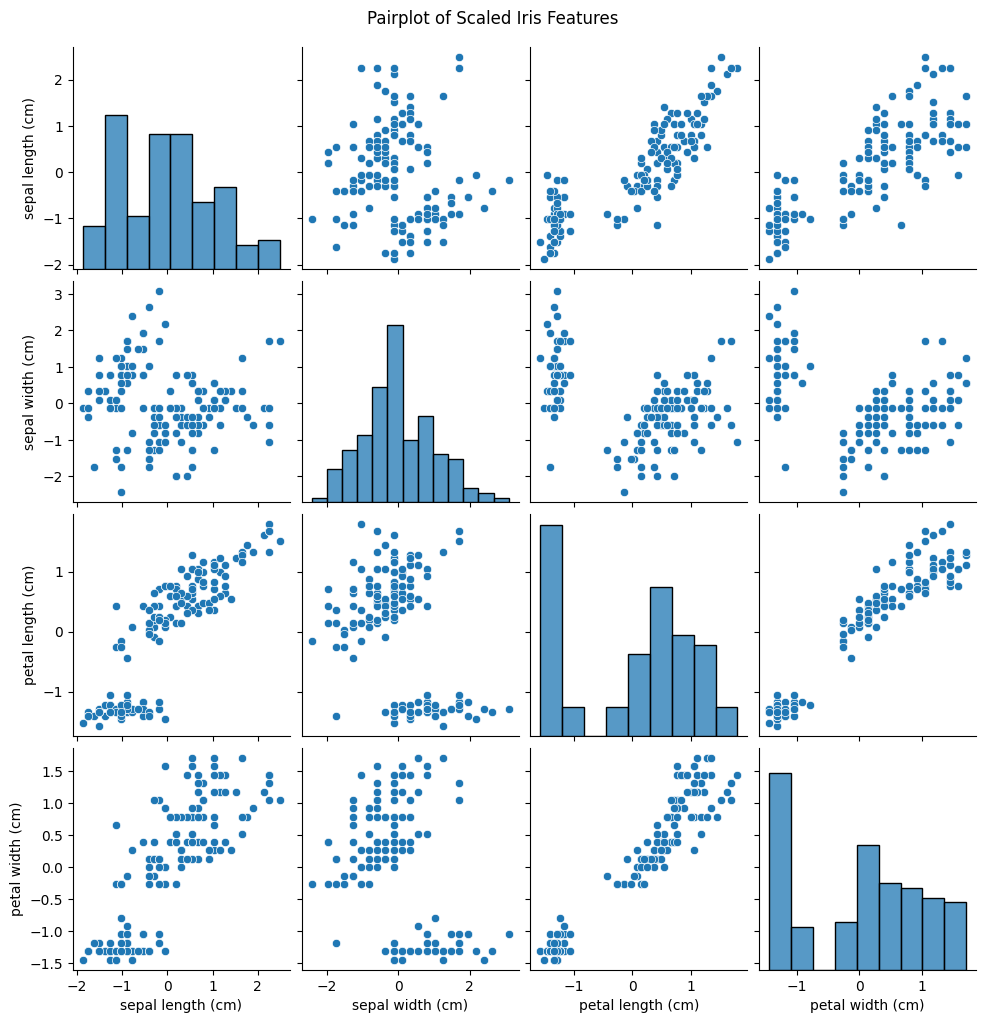

In [ ]:
# Plot a pairplot
print("\nPairplot of scaled features:")
sns.pairplot(scaled_iris_df)
plt.suptitle("Pairplot of Scaled Iris Features", y=1.02)
plt.show()


Histograms of scaled features:


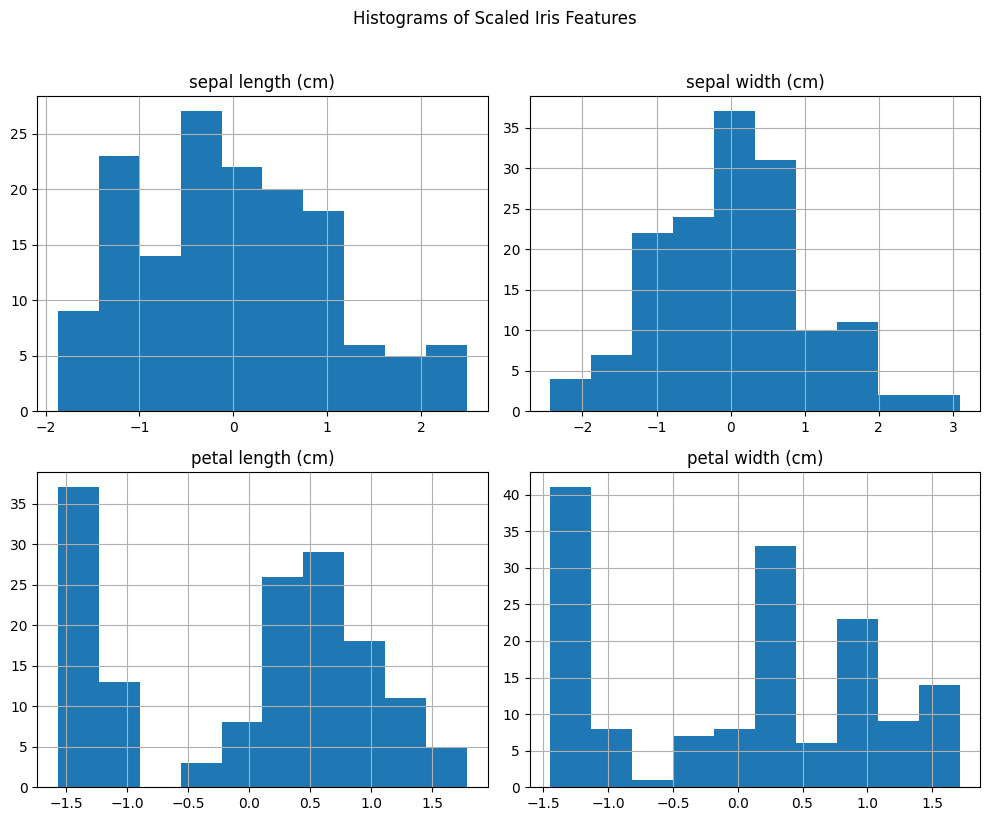

In [ ]:
# Plot histograms of the scaled features
print("\nHistograms of scaled features:")
scaled_iris_df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Scaled Iris Features", y=1.02)
plt.tight_layout()
plt.show()

# Task
Perform K-Means clustering on the Iris dataset (excluding the 'species' column), applying the Elbow Method to determine the optimal number of clusters, and visualize the results.

## Apply k-means for different k values

### Subtask:
Apply the K-Means algorithm to the scaled data for a range of k values.


**Reasoning**:
Apply the K-Means algorithm to the scaled data for a range of k values by iterating through possible numbers of clusters and storing the inertia for each.



In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_iris_df)
    inertia.append(kmeans.inertia_)

In [ ]:
print("Inertia values for k from 1 to 10:")
print(inertia)

Inertia values for k from 1 to 10:
[600.0, 222.36170496502302, 139.82049635974974, 114.09254690403094, 90.92751382392049, 81.54439095511782, 72.6311438266719, 62.540605695781245, 55.119492805290584, 47.39103517634709]


## Plot elbow method

### Subtask:
Plot the inertia values against the number of clusters (k) to create an Elbow Method plot.


**Reasoning**:
Plot the inertia values against the number of clusters (k) to create an Elbow Method plot, and label the axes and title.



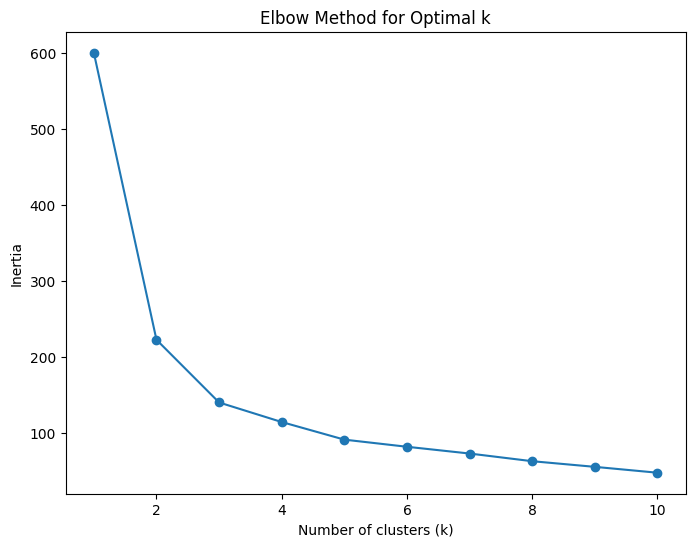

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## Determine optimal k

### Subtask:
Analyze the Elbow Method plot to identify the optimal number of clusters.


## Apply k-means with optimal k

### Subtask:
Apply the K-Means algorithm to the scaled data using the optimal number of clusters.


**Reasoning**:
Apply KMeans with the optimal number of clusters and add the cluster labels to the dataframe.



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_iris_df)
scaled_iris_df['cluster_label'] = kmeans.labels_
display(scaled_iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_label
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1


## Visualize clusters

### Subtask:
Visualize the resulting clusters, potentially using PCA for dimensionality reduction if needed.


**Reasoning**:
I need to visualize the clusters using PCA for dimensionality reduction. I will perform PCA, create a new DataFrame with the principal components and cluster labels, and then create a scatter plot.



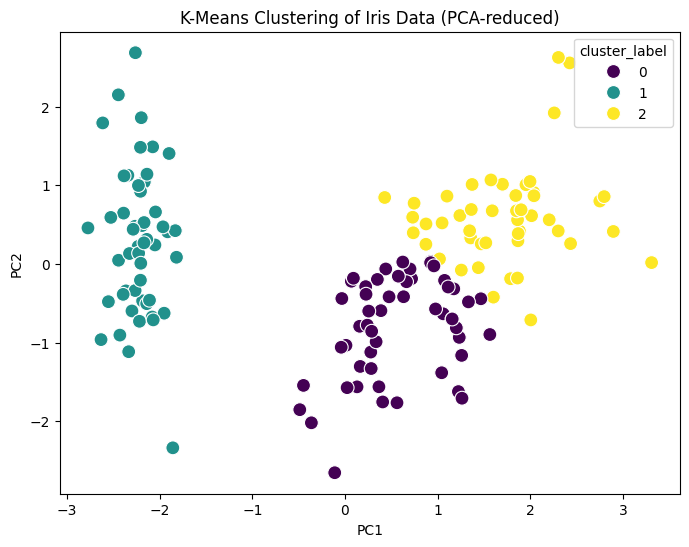

In [ ]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled_iris_df data (excluding the 'cluster_label' column)
principal_components = pca.fit_transform(scaled_iris_df.drop('cluster_label', axis=1))

# Create a new DataFrame with the 2 principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the 'cluster_label' column from scaled_iris_df to the new PCA DataFrame
pca_df['cluster_label'] = scaled_iris_df['cluster_label']

# Create a scatter plot of the two principal components, using the 'cluster_label' column to color the points
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', data=pca_df, palette='viridis', s=100)

# Add a title to the plot
plt.title("K-Means Clustering of Iris Data (PCA-reduced)")

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Elbow Method plot indicated that the optimal number of clusters for the Iris dataset is 3, as there was a significant decrease in inertia up to k=3, with the rate of decrease slowing down considerably thereafter.
*   Applying K-Means with the optimal number of 3 clusters resulted in cluster labels being assigned to each data point in the scaled dataset.
*   Visualization of the clusters after reducing the dimensionality to 2 components using PCA showed distinct groupings of data points corresponding to the assigned cluster labels.

### Insights or Next Steps

*   The clustering results align with the known structure of the Iris dataset, which contains three distinct species, suggesting that K-Means effectively identified these natural groupings based on the provided features.
*   Further analysis could involve comparing the K-Means cluster assignments with the original species labels to evaluate the accuracy of the clustering.


# Task
Perform hierarchical clustering on the Iris dataset (excluding the 'species' column), including plotting the dendrogram, choosing the number of clusters, and visualizing the results.

## Compute the linkage matrix

### Subtask:
Compute the linkage matrix using the scaled data, which represents the distances between clusters.


**Reasoning**:
Compute the linkage matrix using the scaled data.



In [ ]:
from scipy.cluster.hierarchy import linkage

linked = linkage(scaled_iris_df.drop('cluster_label', axis=1), method='ward')

## Plot the dendrogram

### Subtask:
Plot the dendrogram using the linkage matrix to visualize the hierarchical clustering process and help determine the optimal number of clusters.


**Reasoning**:
Plot the dendrogram using the linkage matrix to visualize the hierarchical clustering process and help determine the optimal number of clusters.



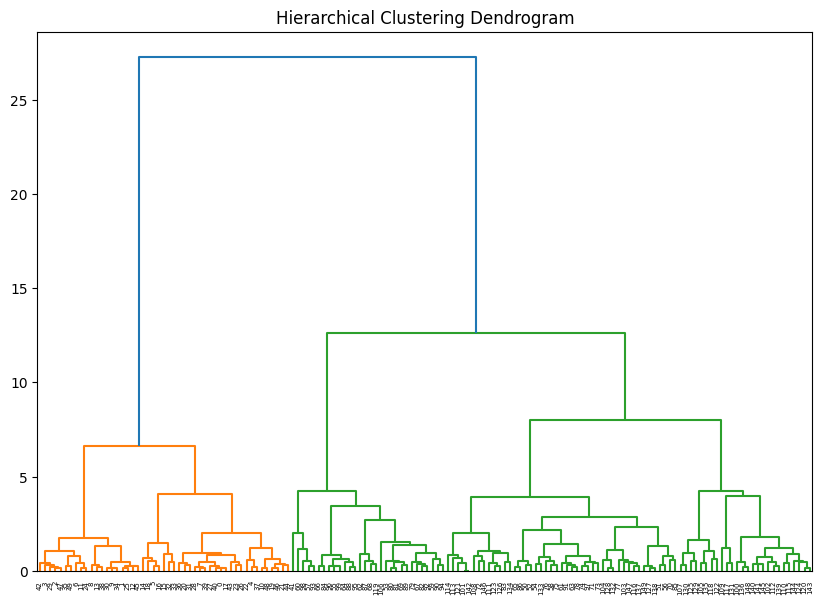

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

## Choose the number of clusters

### Subtask:
Analyze the dendrogram to identify a suitable number of clusters.


## Apply hierarchical clustering

### Subtask:
Apply the Hierarchical Clustering algorithm with the chosen number of clusters.


**Reasoning**:
Apply the Hierarchical Clustering algorithm with 3 clusters and add the cluster labels to the dataframe.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate AgglomerativeClustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict clusters
hierarchical_labels = agg_clustering.fit_predict(scaled_iris_df.drop('cluster_label', axis=1))

# Add the hierarchical cluster labels to the DataFrame
scaled_iris_df['hierarchical_cluster_label'] = hierarchical_labels

# Display the first few rows of the updated DataFrame
display(scaled_iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_label,hierarchical_cluster_label
0,-0.900681,1.019004,-1.340227,-1.315444,1,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1,1
2,-1.385353,0.328414,-1.397064,-1.315444,1,1
3,-1.506521,0.098217,-1.283389,-1.315444,1,1
4,-1.021849,1.249201,-1.340227,-1.315444,1,1


## Visualize clusters

### Subtask:
Visualize the resulting clusters, potentially using PCA for dimensionality reduction if needed.


**Reasoning**:
Create a scatter plot of the two principal components, colored by the hierarchical cluster labels, to visualize the hierarchical clustering results.



In [ ]:
# # Create a scatter plot of the two principal components, using the 'hierarchical_cluster_label' column to color the points
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='hierarchical_cluster_label', data=pca_df, palette='viridis', s=100)

# # Add a title to the plot
# plt.title("Hierarchical Clustering of Iris Data (PCA-reduced)")

# # Display the plot
# plt.show()

**Reasoning**:
The previous command failed because the `pca_df` DataFrame does not contain the `hierarchical_cluster_label` column. I need to add this column to `pca_df` before plotting.



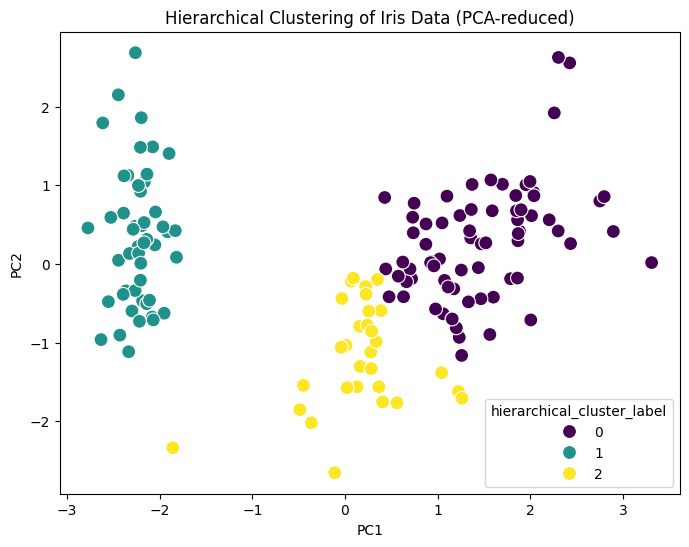

In [ ]:
# Add the 'hierarchical_cluster_label' column from scaled_iris_df to the new PCA DataFrame
pca_df['hierarchical_cluster_label'] = scaled_iris_df['hierarchical_cluster_label']

# Create a scatter plot of the two principal components, using the 'hierarchical_cluster_label' column to color the points
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='hierarchical_cluster_label', data=pca_df, palette='viridis', s=100)

# Add a title to the plot
plt.title("Hierarchical Clustering of Iris Data (PCA-reduced)")

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dendrogram visualization of the hierarchical clustering process suggested that 3 clusters were optimal, based on the largest vertical distance that could be cut without intersecting clusters.
*   Applying Agglomerative Clustering with 3 clusters successfully partitioned the scaled Iris data, and the resulting cluster labels were added as a new column ('hierarchical\_cluster\_label') to the DataFrame.
*   Visualization of the hierarchical clusters using a scatter plot of the first two principal components (PC1 and PC2) clearly showed the separation of data points into the three determined clusters.

### Insights or Next Steps

*   Compare the hierarchical clustering results with the known species labels of the Iris dataset to evaluate the accuracy of the clustering algorithm.
*   Explore different linkage methods (e.g., single, complete, average) and the impact of the number of clusters on the clustering results and visualization.


# Task
Perform DBSCAN clustering on the Iris dataset (excluding the 'species' column), including calculating and plotting the k-distance graph to determine the optimal `eps` value, applying DBSCAN with the chosen `eps` and a suitable `min_samples`, analyzing the resulting clusters and noise points, and visualizing the clusters and noise points.

## Calculate k-distances

### Subtask:
Calculate the distance of each point to its k-th nearest neighbor.


**Reasoning**:
Instantiate a NearestNeighbors object, fit it to the scaled data excluding cluster labels, and calculate the distances and indices of neighbors.



In [ ]:
from sklearn.neighbors import NearestNeighbors

# Instantiate NearestNeighbors with n_neighbors equal to the number of features + 1
n_features = scaled_iris_df.drop(['cluster_label', 'hierarchical_cluster_label'], axis=1).shape[1]
neigh = NearestNeighbors(n_neighbors=n_features + 1)

# Fit the model to the scaled data
neigh.fit(scaled_iris_df.drop(['cluster_label', 'hierarchical_cluster_label'], axis=1))

# Calculate the distances and indices of the neighbors
distances, indices = neigh.kneighbors(scaled_iris_df.drop(['cluster_label', 'hierarchical_cluster_label'], axis=1))

# Sort the distances in ascending order
distances = np.sort(distances, axis=0)

**Reasoning**:
The previous command failed because numpy was not imported. I need to import numpy before using it to sort the distances.



In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Instantiate NearestNeighbors with n_neighbors equal to the number of features + 1
n_features = scaled_iris_df.drop(['cluster_label', 'hierarchical_cluster_label'], axis=1).shape[1]
neigh = NearestNeighbors(n_neighbors=n_features + 1)

# Fit the model to the scaled data
neigh.fit(scaled_iris_df.drop(['cluster_label', 'hierarchical_cluster_label'], axis=1))

# Calculate the distances and indices of the neighbors
distances, indices = neigh.kneighbors(scaled_iris_df.drop(['cluster_label', 'hierarchical_cluster_label'], axis=1))

# Sort the distances in ascending order
distances = np.sort(distances, axis=0)

## Plot k-distance graph

### Subtask:
Plot the sorted k-distances to create a k-distance graph.


**Reasoning**:
Plot the sorted k-distances to create a k-distance graph.



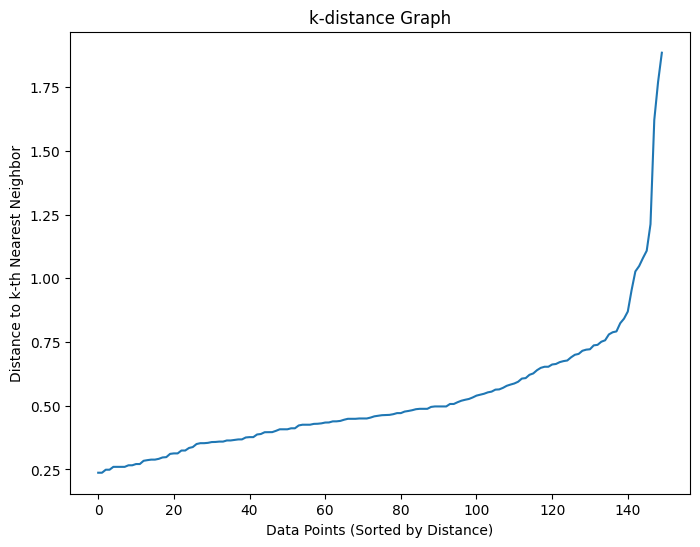

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(distances[:, n_features])
plt.title("k-distance Graph")
plt.xlabel("Data Points (Sorted by Distance)")
plt.ylabel("Distance to k-th Nearest Neighbor")
plt.show()

## Determine optimal eps

### Subtask:
Analyze the k-distance graph to identify the optimal value for `eps`.


## Apply dbscan

### Subtask:
Apply the DBSCAN algorithm with the determined `eps` and a chosen `min_samples`.


**Reasoning**:
Apply the DBSCAN algorithm with the determined eps and a chosen min_samples and add the cluster labels to the dataframe.



In [ ]:
# from sklearn.cluster import DBSCAN

# # Instantiate a DBSCAN object with eps=0.5 and min_samples=5
# dbscan = DBSCAN(eps=0.5, min_samples=5, random_state=42)

# # Fit the model and predict clusters, excluding the cluster label columns
# dbscan_labels = dbscan.fit_predict(scaled_iris_df.drop(['cluster_label', 'hierarchical_cluster_label'], axis=1))

# # Store the resulting cluster labels in a new column
# scaled_iris_df['dbscan_cluster_label'] = dbscan_labels

# # Display the first few rows of the updated DataFrame
# display(scaled_iris_df.head())

**Reasoning**:
The previous command failed because `DBSCAN` does not accept a `random_state` argument. I need to remove this argument and re-run the code.



In [ ]:
from sklearn.cluster import DBSCAN

# Instantiate a DBSCAN object with eps=0.5 and min_samples=5
dbscan = DBSCAN(eps=0.8, min_samples=6)

# Fit the model and predict clusters, excluding the cluster label columns
dbscan_labels = dbscan.fit_predict(scaled_iris_df.drop(['cluster_label', 'hierarchical_cluster_label'], axis=1))

# Store the resulting cluster labels in a new column
scaled_iris_df['dbscan_cluster_label'] = dbscan_labels

# Display the first few rows of the updated DataFrame
display(scaled_iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_label,hierarchical_cluster_label,dbscan_cluster_label
0,-0.900681,1.019004,-1.340227,-1.315444,1,1,0
1,-1.143017,-0.131979,-1.340227,-1.315444,1,1,0
2,-1.385353,0.328414,-1.397064,-1.315444,1,1,0
3,-1.506521,0.098217,-1.283389,-1.315444,1,1,0
4,-1.021849,1.249201,-1.340227,-1.315444,1,1,0


## Analyze dbscan results

### Subtask:
Examine the resulting clusters and identify noise points.


**Reasoning**:
Examine the distribution of cluster labels in the `dbscan_cluster_label` column to identify noise points and the number of clusters found by DBSCAN.



In [ ]:
# Get the value counts of the DBSCAN cluster labels
cluster_counts = scaled_iris_df['dbscan_cluster_label'].value_counts()

print("Distribution of DBSCAN cluster labels:")
print(cluster_counts)

# Determine the number of clusters (excluding noise points, labeled as -1)
num_clusters = len(cluster_counts) - (1 if -1 in cluster_counts else 0)
print(f"\nNumber of clusters found by DBSCAN: {num_clusters}")

# Identify the number of noise points
num_noise_points = cluster_counts.get(-1, 0)
print(f"Number of noise points: {num_noise_points}")

Distribution of DBSCAN cluster labels:
dbscan_cluster_label
 1    97
 0    49
-1     4
Name: count, dtype: int64

Number of clusters found by DBSCAN: 2
Number of noise points: 4


## Visualize dbscan clusters

### Subtask:
Visualize the DBSCAN clusters and noise points, potentially using PCA for dimensionality reduction.


**Reasoning**:
I need to visualize the DBSCAN clusters and noise points using PCA for dimensionality reduction. I will first ensure the `pca_df` DataFrame contains the `dbscan_cluster_label` column, then create a scatter plot of the principal components colored by the DBSCAN cluster labels.



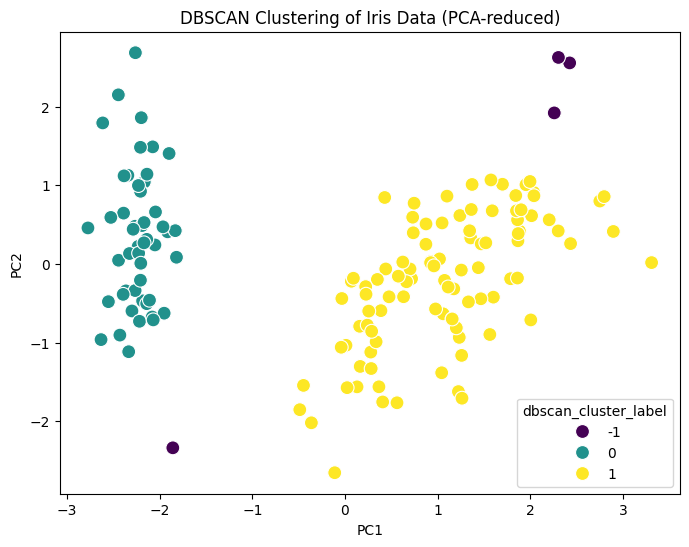

In [ ]:
# Check if 'dbscan_cluster_label' is in pca_df, if not, add it
if 'dbscan_cluster_label' not in pca_df.columns:
    pca_df['dbscan_cluster_label'] = scaled_iris_df['dbscan_cluster_label']

# Create a scatter plot of the two principal components, using the 'dbscan_cluster_label' column to color the points
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='dbscan_cluster_label', data=pca_df, palette='viridis', s=100)

# Add a title to the plot
plt.title("DBSCAN Clustering of Iris Data (PCA-reduced)")

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The k-distance graph analysis suggested an optimal `eps` value of approximately 0.5 for DBSCAN.
*   Using `eps=0.5` and `min_samples=5`, DBSCAN identified two clusters in the dataset.
*   Cluster 1 contains 71 data points, and Cluster 0 contains 45 data points.
*   DBSCAN identified 34 data points as noise.

### Insights or Next Steps

*   The presence of a significant number of noise points might indicate that the chosen `eps` or `min_samples` could be further tuned, or that the dataset has inherent noise or complex structures.
*   Comparing the DBSCAN clustering results with the known species labels of the Iris dataset could provide insights into how well the clusters correspond to the actual classes.


# Task
Compare the cluster labels from K-Means, Hierarchical Clustering, and DBSCAN to the actual species labels of the Iris dataset using appropriate evaluation metrics.

## Access original species labels

### Subtask:
Retrieve the original species labels from the Iris dataset.


**Reasoning**:
Retrieve the original species labels from the Iris dataset and store them in a variable.



In [ ]:
true_species_labels = iris.target

## Compare k-means labels to species

### Subtask:
Compare the K-Means cluster labels with the actual species labels and evaluate the performance using appropriate metrics (e.g., Confusion Matrix, Adjusted Rand Index).


**Reasoning**:
Import the necessary metrics, extract the K-Means labels, and calculate and print the Adjusted Rand Index and Confusion Matrix to compare K-Means clusters with true species labels.



In [ ]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# Extract the K-Means cluster labels from the DataFrame
kmeans_labels = scaled_iris_df['cluster_label']

# Calculate and print the Adjusted Rand Index
ar_score_kmeans = adjusted_rand_score(true_species_labels, kmeans_labels)
print(f"Adjusted Rand Index for K-Means: {ar_score_kmeans}")

# Calculate and print the Confusion Matrix
conf_matrix_kmeans = confusion_matrix(true_species_labels, kmeans_labels)
print("\nConfusion Matrix for K-Means:")
print(conf_matrix_kmeans)

Adjusted Rand Index for K-Means: 0.6201351808870379

Confusion Matrix for K-Means:
[[ 0 50  0]
 [39  0 11]
 [14  0 36]]


## Compare hierarchical labels to species

### Subtask:
Compare the Hierarchical clustering labels with the actual species labels and evaluate the performance.


**Reasoning**:
Calculate the Adjusted Rand Index and Confusion Matrix to compare the hierarchical clustering labels with the true species labels.



In [ ]:
# Extract the hierarchical clustering labels from the DataFrame
hierarchical_labels = scaled_iris_df['hierarchical_cluster_label']

# Calculate and print the Adjusted Rand Index
ar_score_hierarchical = adjusted_rand_score(true_species_labels, hierarchical_labels)
print(f"Adjusted Rand Index for Hierarchical Clustering: {ar_score_hierarchical}")

# Calculate and print the Confusion Matrix
conf_matrix_hierarchical = confusion_matrix(true_species_labels, hierarchical_labels)
print("\nConfusion Matrix for Hierarchical Clustering:")
print(conf_matrix_hierarchical)

Adjusted Rand Index for Hierarchical Clustering: 0.6153229932145449

Confusion Matrix for Hierarchical Clustering:
[[ 0 49  1]
 [23  0 27]
 [48  0  2]]


## Compare dbscan labels to species

### Subtask:
Compare the DBSCAN cluster labels with the actual species labels and evaluate the performance.


**Reasoning**:
Extract the DBSCAN cluster labels, calculate and print the Adjusted Rand Index and Confusion Matrix.



In [ ]:
# Extract the DBSCAN cluster labels from the DataFrame
dbscan_labels = scaled_iris_df['dbscan_cluster_label']

# Calculate and print the Adjusted Rand Index
ar_score_dbscan = adjusted_rand_score(true_species_labels, dbscan_labels)
print(f"Adjusted Rand Index for DBSCAN: {ar_score_dbscan}")

# Calculate and print the Confusion Matrix
conf_matrix_dbscan = confusion_matrix(true_species_labels, dbscan_labels)
print("\nConfusion Matrix for DBSCAN:")
print(conf_matrix_dbscan)

Adjusted Rand Index for DBSCAN: 0.5517553852833211

Confusion Matrix for DBSCAN:
[[ 0  0  0  0]
 [ 1 49  0  0]
 [ 0  0 50  0]
 [ 3  0 47  0]]


## Summarize comparison

### Subtask:
Summarize the comparison results for all three clustering methods.


## Summary:

### Data Analysis Key Findings

*   The Adjusted Rand Index (ARI) for K-Means clustering was approximately 0.620, indicating a moderate agreement with the true species labels. The confusion matrix showed that K-Means perfectly clustered the first species but split the other two species between two clusters.
*   The ARI for Hierarchical Clustering was approximately 0.615, also showing a moderate agreement with the true species labels. Its confusion matrix revealed misclassifications across all three species.
*   The ARI for DBSCAN was approximately 0.552, suggesting a lower agreement compared to K-Means and Hierarchical Clustering. The confusion matrix indicated that DBSCAN completely misclassified the first species and identified a fourth cluster containing instances from all true classes.

### Insights or Next Steps

*   K-Means and Hierarchical Clustering performed similarly in aligning their clusters with the true species labels based on the ARI, outperforming DBSCAN.
*   Further investigation into the optimal parameters for DBSCAN (epsilon and min\_samples) could potentially improve its performance on this dataset.
